In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This dataset is obtained from https://github.com/oreillymedia/doing_data_science following the book Doing Data Science by Cathy O'Neil and Rachel Schutt (9781449358655). The description given about this dataset is as follows:

`Each one (dataset) represents one (simulated) days' worth of ads shown and clicks recorded on the New York Times home page in May 2012. Each row represents a single user. There are five columns: age, gender (0=female, 1=male), number impressions, number clicks, and logged-in.`

In [2]:
# Available Data
data_directory = "./Data/nyt/"
file_names = ["nyt"+str(i)+".csv" for i in range(1,32)] #nyt1 to nyt31
file_paths = [data_directory+file_name for file_name in file_names]

print(f"Number of Files: {len(file_paths)}")
print(f"First File Path: {file_paths[0]}")
print(f"Last File Path: {file_paths[-1]}")

Number of Files: 31
First File Path: ./Data/nyt/nyt1.csv
Last File Path: ./Data/nyt/nyt31.csv


## Explatory Data Analysis (EDA)

In [3]:
df1 = pd.read_csv(file_paths[0])
print(df1.shape)
print(df1.head())

(458441, 5)
   Age  Gender  Impressions  Clicks  Signed_In
0   36       0            3       0          1
1   73       1            3       0          1
2   30       0            3       0          1
3   49       1            3       0          1
4   47       1           11       0          1


Considering this dataset, it's apparent that the most important and relevant metrics are the number of Impressions and Clicks. Hence, the first step is to observe the general trends of these two metrics, primarily the distribution and if there is any obvious trends or relationship between the two. To do this, we plot the respective histogram and a scatter plot.

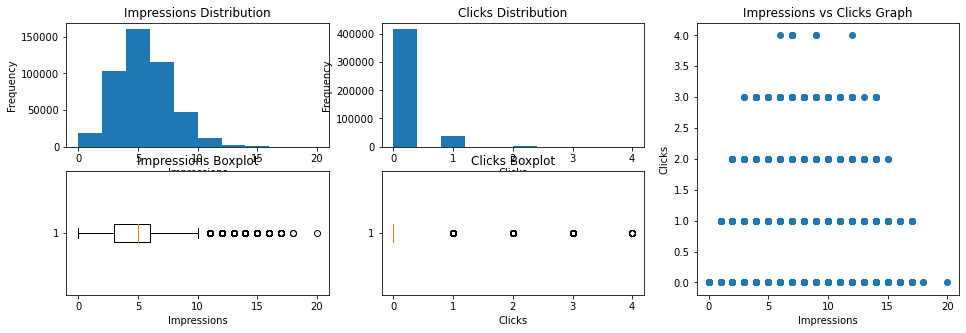

In [4]:
# Make a larger figure size
fig = plt.figure(figsize=(16,5))
# Subplot 1 - Histogram & Boxplot Plot of # of Impressions
plt.subplot(2,3,1)
plt.hist(df1['Impressions'])
plt.title('Impressions Distribution')
plt.xlabel("Impressions")
plt.ylabel("Frequency")
plt.subplot(2,3,4)
plt.boxplot(df1['Impressions'], vert=False)
plt.title('Impressions Boxplot')
plt.xlabel("Impressions")
# Subplot 2 - Histogram & Boxplot Plot of # of Clicks
plt.subplot(2,3,2)
plt.hist(df1['Clicks'])
plt.title('Clicks Distribution')
plt.xlabel("Clicks")
plt.ylabel("Frequency")
plt.subplot(2,3,5)
plt.boxplot(df1['Clicks'], vert=False)
plt.title('Clicks Boxplot')
plt.xlabel("Clicks")
# Subplot 3 - Scatter Plot between # of Impressions and # of Clicks
plt.subplot(1,3,3)
plt.scatter(df1['Impressions'], df1['Clicks'])
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.title('Impressions vs Clicks Graph')
# Display Plot
plt.show()

Quick Observations:
- \# of Impressions follow a Normal Distribution
- \# of Clicks' distribution decreases exponentially
- There are no obvious relationship/trends between the # of Impressions and Clicks

A more valuable metric, namely the Click-Through Rate (CTR) can be made by the ratio between the \# of Clicks to the \# of Impressions. This allows us to see easier the number of clicks per impression.

In [5]:
# Adding the Click Through Rate into the Data Frame
df1['CTR'] = df1['Clicks'] / df1['Impressions']
print(df1.head())

   Age  Gender  Impressions  Clicks  Signed_In  CTR
0   36       0            3       0          1  0.0
1   73       1            3       0          1  0.0
2   30       0            3       0          1  0.0
3   49       1            3       0          1  0.0
4   47       1           11       0          1  0.0


In [7]:
df1['CTR'].isnull().values.any()

True

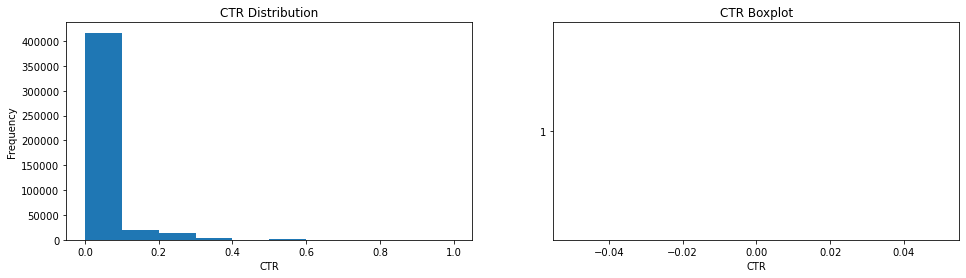

In [6]:
# Make a larger figure size
fig = plt.figure(figsize=(16,4))
# Subplot 1 - Histogram & Boxplot Plot of # of Impressions
plt.subplot(1,2,1)
plt.hist(df1['CTR'])
plt.title('CTR Distribution')
plt.xlabel("CTR")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
plt.boxplot(df1['CTR'], vert=False)
plt.title('CTR Boxplot')
plt.xlabel("CTR")
plt.show()

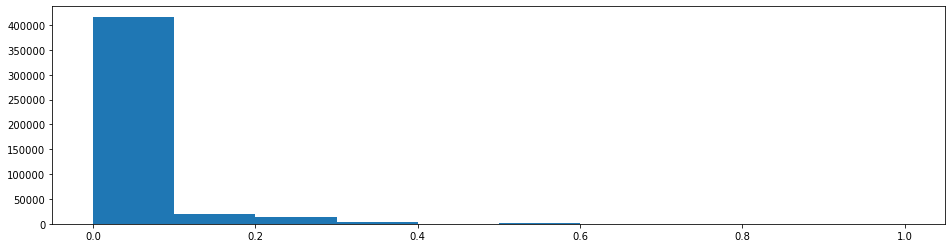

In [80]:
fig2 = plt.figure(figsize=(16,4))

plt.hist(df1['CTR'])
plt.show()

In [67]:
df1_SM = df1.query('Signed_In == 1 & Gender == 0')
df1_SF = df1.query('Signed_In == 1 & Gender == 1')
df1_UM = df1.query('Signed_In == 0 & Gender == 0')
df1_UF = df1.query('Signed_In == 0 & Gender == 1')

print(f"Signed_In Male Dataset: {df1_SM.shape}")
print(f"Signed_In Female Dataset: {df1_SF.shape}")
print(f"Not Signed_In (Unsigned) Male Dataset: {df1_UM.shape}")
print(f"Not Signed_In (Unsigned) Female Dataset: {df1_UF.shape}")
print(df1_SM.shape, df1_SF.shape, df1_UM.shape, df1_UF.shape)

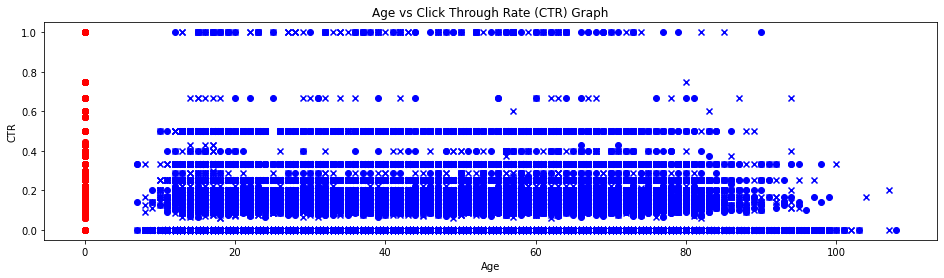

In [79]:
fig3 = plt.figure(figsize=(16,4))

plt.scatter(df1_SM['Age'], df1_SM['CTR'], color="blue", marker='o')
plt.scatter(df1_SF['Age'], df1_SF['CTR'], color="blue", marker='x')
plt.scatter(df1_UM['Age'], df1_UM['CTR'], color="red", marker='o')
plt.scatter(df1_UF['Age'], df1_UF['CTR'], color="red", marker='x')
plt.xlabel('Age')
plt.ylabel('CTR')
plt.title('Age vs Click Through Rate (CTR) Graph')
plt.show()

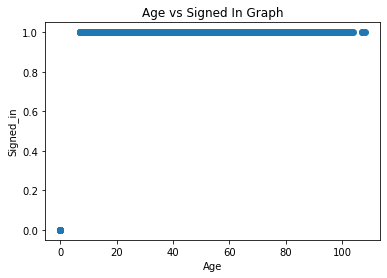

In [43]:
plt.scatter(df1['Age'], df1['Signed_In'])
plt.xlabel('Age')
plt.ylabel('Signed_in')
plt.title('Age vs Signed In Graph')
plt.show()

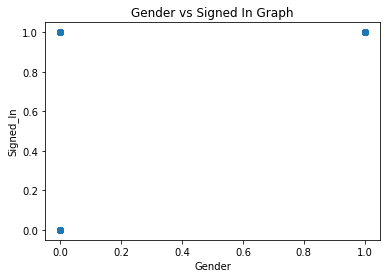

In [44]:
plt.scatter(df1['Gender'], df1['Signed_In'])
plt.xlabel('Gender')
plt.ylabel('Signed_In')
plt.title('Gender vs Signed In Graph')
plt.show()